--- Part 1: Review of Interpolation Concepts ---
Discussion: Interpolation is a fundamental technique in engineering and scientific computing used to estimate values
between known data points. It allows us to construct a continuous function from a discrete set of data,
which is useful for tasks like data smoothing, forecasting, and creating mathematical models from experimental results.

--- Task A: Newton's Divided Difference Method ---
Discussion: Newton's Divided Difference method is an efficient way to construct an interpolating polynomial,
especially when adding new data points, as it builds upon previous calculations. It provides the polynomial
in a hierarchical form, making coefficient calculation straightforward.

--- Task B: Direct Method of Interpolation ---
Discussion: Direct interpolation methods, like Lagrange interpolation or polynomial fitting with numpy.polyfit,
directly construct the interpolating polynomial. Lagrange method is explicit and uses basis polynomials,
whil

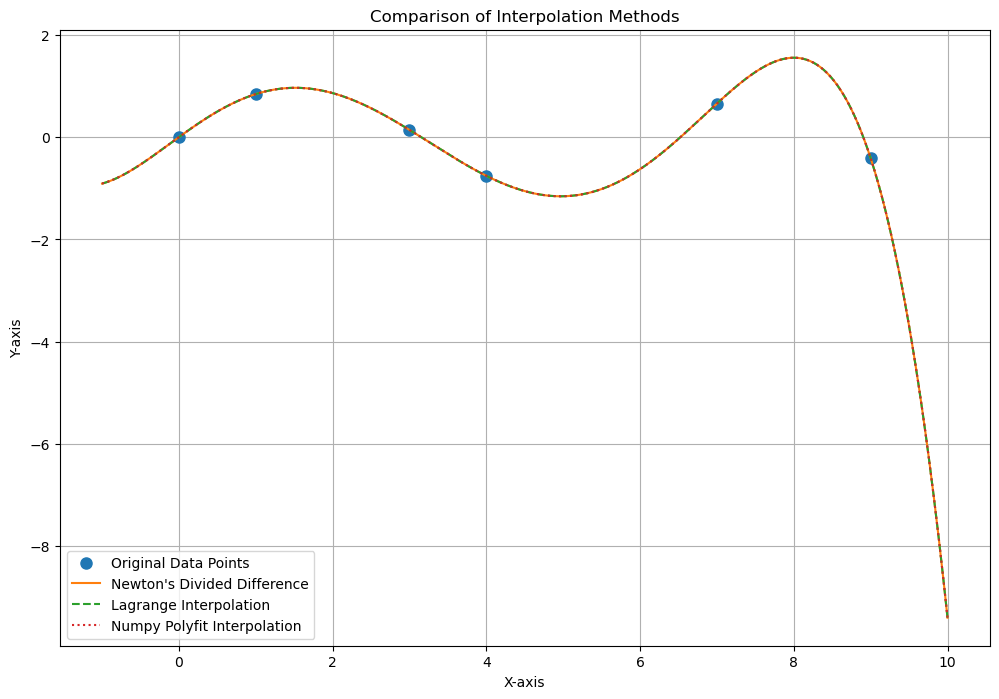


--- Discussion on Accuracy and Behavior ---
Discussion: While all three methods produce the same interpolating polynomial for a given set of data points,
their computational approaches differ. Newton's method is often preferred for adding new data points due to its
incremental nature. The direct methods (Lagrange and numpy.polyfit for exact fit) are straightforward for a fixed dataset.
The 'Runge phenomenon' is a notable issue, especially with high-degree polynomial interpolation over equally spaced points.
It can lead to significant oscillations and poor accuracy near the ends of the interval, even if the polynomial fits
the data points perfectly. This is why care must be taken when interpolating, and sometimes lower-degree polynomials
or spline interpolation are preferred to avoid such issues for certain datasets.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from sympy import symbols, expand # For symbolic polynomial representation

# --- Part 1: Review of Interpolation Concepts ---
# Discussion:
# Interpolation is a fundamental technique in engineering and scientific computing used to estimate values
# between known data points. It allows us to construct a continuous function from a discrete set of data,
# which is useful for tasks like data smoothing, forecasting, and creating mathematical models from experimental results.

print("--- Part 1: Review of Interpolation Concepts ---")
print("Discussion: Interpolation is a fundamental technique in engineering and scientific computing used to estimate values")
print("between known data points. It allows us to construct a continuous function from a discrete set of data,")
print("which is useful for tasks like data smoothing, forecasting, and creating mathematical models from experimental results.\n")


# --- Part 2: Script Development ---

# Task A: Newton's Divided Difference Method
def newton_divided_difference(x_data, y_data):
    """
    Implements Newton's Divided Difference method for polynomial interpolation.

    Args:
        x_data (list or np.array): A list or array of x-coordinates.
        y_data (list or np.array): A list or array of y-coordinates corresponding to x_data.

    Returns:
        tuple: A tuple containing:
            - divided_diff_table (np.array): The divided difference table.
            - coeffs (np.array): The coefficients of the interpolating polynomial.
    """
    n = len(x_data)
    divided_diff_table = np.zeros((n, n))
    divided_diff_table[:, 0] = y_data

    for j in range(1, n):
        for i in range(n - j):
            divided_diff_table[i, j] = (divided_diff_table[i + 1, j - 1] - divided_diff_table[i, j - 1]) / \
                                      (x_data[i + j] - x_data[i])

    # The coefficients are the first row of the divided difference table
    coeffs = divided_diff_table[0, :]
    return divided_diff_table, coeffs

def evaluate_newton_polynomial(x_data, coeffs, x_val):
    """
    Evaluates the Newton interpolating polynomial at a given value.

    Args:
        x_data (list or np.array): The x-coordinates used to construct the polynomial.
        coeffs (np.array): The coefficients of the Newton polynomial (from newton_divided_difference).
        x_val (float): The value at which to evaluate the polynomial.

    Returns:
        float: The interpolated y-value.
    """
    n = len(coeffs)
    result = coeffs[0]
    for i in range(1, n):
        term = coeffs[i]
        for j in range(i):
            term *= (x_val - x_data[j])
        result += term
    return result

def get_newton_polynomial_expression(x_data, coeffs):
    """
    Generates the symbolic expression of the Newton interpolating polynomial.
    """
    x = symbols('x')
    poly_expr = coeffs[0]
    for i in range(1, len(coeffs)):
        term_expr = coeffs[i]
        for j in range(i):
            term_expr *= (x - x_data[j])
        poly_expr += term_expr
    return expand(poly_expr)


print("--- Task A: Newton's Divided Difference Method ---")
print("Discussion: Newton's Divided Difference method is an efficient way to construct an interpolating polynomial,")
print("especially when adding new data points, as it builds upon previous calculations. It provides the polynomial")
print("in a hierarchical form, making coefficient calculation straightforward.\n")

# Task B: Direct Method of Interpolation
def direct_interpolation_lagrange(x_data, y_data, x_val):
    """
    Implements Lagrange interpolation, a direct method, and evaluates it at a given value.

    Args:
        x_data (list or np.array): A list or array of x-coordinates.
        y_data (list or np.array): A list or array of y-coordinates corresponding to x_data.
        x_val (float): The value at which to evaluate the polynomial.

    Returns:
        float: The interpolated y-value.
    """
    poly = lagrange(x_data, y_data)
    return poly(x_val)

def direct_interpolation_polyfit(x_data, y_data, x_val):
    """
    Implements polynomial curve fitting using numpy.polyfit and evaluates it at a given value.

    Args:
        x_data (list or np.array): A list or array of x-coordinates.
        y_data (list or np.array): A list or array of y-coordinates corresponding to x_data.
        x_val (float): The value at which to evaluate the polynomial.

    Returns:
        float: The interpolated y-value.
    """
    # The degree of the polynomial will be len(x_data) - 1 for exact interpolation
    degree = len(x_data) - 1
    coeffs = np.polyfit(x_data, y_data, degree)
    poly = np.poly1d(coeffs)
    return poly(x_val)

def get_lagrange_polynomial_expression(x_data, y_data):
    """
    Generates the symbolic expression of the Lagrange interpolating polynomial.
    """
    x = symbols('x')
    poly = lagrange(x_data, y_data)
    # Convert numpy.poly1d object to a sympy expression
    coeffs = poly.coeffs
    order = len(coeffs) - 1
    expr = 0
    for i, coeff in enumerate(coeffs):
        expr += coeff * x**(order - i)
    return expand(expr)

def get_polyfit_polynomial_expression(x_data, y_data):
    """
    Generates the symbolic expression of the polynomial from numpy.polyfit.
    """
    x = symbols('x')
    degree = len(x_data) - 1
    coeffs = np.polyfit(x_data, y_data, degree)
    poly = np.poly1d(coeffs)
    # Convert numpy.poly1d object to a sympy expression
    coeffs_poly1d = poly.coeffs
    order = len(coeffs_poly1d) - 1
    expr = 0
    for i, coeff in enumerate(coeffs_poly1d):
        expr += coeff * x**(order - i)
    return expand(expr)

print("--- Task B: Direct Method of Interpolation ---")
print("Discussion: Direct interpolation methods, like Lagrange interpolation or polynomial fitting with numpy.polyfit,")
print("directly construct the interpolating polynomial. Lagrange method is explicit and uses basis polynomials,")
print("while numpy.polyfit uses least squares to find polynomial coefficients, which for exact interpolation with n points")
print("and degree n-1 will pass through all points.\n")


# --- Task C: Comparison and Testing ---

# Given dataset (at least 6 points)
x_dataset = np.array([0, 1, 3, 4, 7, 9])
y_dataset = np.array([0, 0.8415, 0.1411, -0.7568, 0.6570, -0.4121]) # Example: sin(x) values approximately

# Test points
test_points = [2.5, 4.5, 6.0]

print("--- Task C: Comparison and Testing ---")
print(f"Dataset used: X = {x_dataset}, Y = {y_dataset}")
print(f"Test points for evaluation: {test_points}\n")

# Apply Newton's Divided Difference Method
print("--- Newton's Divided Difference Method Results ---")
divided_diff_table, newton_coeffs = newton_divided_difference(x_dataset, y_dataset)
print("Divided Difference Table:")
print(divided_diff_table)
print("\nCoefficients (first row of divided difference table):")
print(newton_coeffs)

newton_poly_expr = get_newton_polynomial_expression(x_dataset, newton_coeffs)
print(f"\nNewton Interpolating Polynomial Expression: P_N(x) = {newton_poly_expr}")

print("\nEvaluation at test points:")
for tp in test_points:
    evaluated_val = evaluate_newton_polynomial(x_dataset, newton_coeffs, tp)
    print(f"P_N({tp}) = {evaluated_val}")

# Apply Direct Method (Lagrange Interpolation)
print("\n--- Direct Method (Lagrange Interpolation) Results ---")
lagrange_poly_expr = get_lagrange_polynomial_expression(x_dataset, y_dataset)
print(f"Lagrange Interpolating Polynomial Expression: P_L(x) = {lagrange_poly_expr}")

print("\nEvaluation at test points:")
for tp in test_points:
    evaluated_val = direct_interpolation_lagrange(x_dataset, y_dataset, tp)
    print(f"P_L({tp}) = {evaluated_val}")

# Apply Direct Method (numpy.polyfit)
print("\n--- Direct Method (numpy.polyfit) Results ---")
polyfit_poly_expr = get_polyfit_polynomial_expression(x_dataset, y_dataset)
print(f"Polyfit Interpolating Polynomial Expression: P_F(x) = {polyfit_poly_expr}")

print("\nEvaluation at test points:")
for tp in test_points:
    evaluated_val = direct_interpolation_polyfit(x_dataset, y_dataset, tp)
    print(f"P_F({tp}) = {evaluated_val}")

# Plotting the interpolated curves
print("\n--- Plotting Results ---")
x_plot = np.linspace(min(x_dataset) - 1, max(x_dataset) + 1, 500) # Extend range slightly for better visualization
y_newton_plot = [evaluate_newton_polynomial(x_dataset, newton_coeffs, x_val) for x_val in x_plot]
y_lagrange_plot = [direct_interpolation_lagrange(x_dataset, y_dataset, x_val) for x_val in x_plot]
y_polyfit_plot = [direct_interpolation_polyfit(x_dataset, y_dataset, x_val) for x_val in x_plot]

plt.figure(figsize=(12, 8))
plt.plot(x_dataset, y_dataset, 'o', label='Original Data Points', markersize=8)
plt.plot(x_plot, y_newton_plot, '-', label="Newton's Divided Difference")
plt.plot(x_plot, y_lagrange_plot, '--', label='Lagrange Interpolation')
plt.plot(x_plot, y_polyfit_plot, ':', label='Numpy Polyfit Interpolation')

plt.title('Comparison of Interpolation Methods')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

# Discussion on accuracy and behavior (Runge phenomenon)
print("\n--- Discussion on Accuracy and Behavior ---")
print("Discussion: While all three methods produce the same interpolating polynomial for a given set of data points,")
print("their computational approaches differ. Newton's method is often preferred for adding new data points due to its")
print("incremental nature. The direct methods (Lagrange and numpy.polyfit for exact fit) are straightforward for a fixed dataset.")
print("The 'Runge phenomenon' is a notable issue, especially with high-degree polynomial interpolation over equally spaced points.")
print("It can lead to significant oscillations and poor accuracy near the ends of the interval, even if the polynomial fits")
print("the data points perfectly. This is why care must be taken when interpolating, and sometimes lower-degree polynomials")
print("or spline interpolation are preferred to avoid such issues for certain datasets.\n")

